In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

amazon_reviews.describe()

/var/folders/k9/89sz9rmn25s78pr1yz7ytdz40000gn/T/ipykernel_43892/1549001243.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [3]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(amazon_reviews, 700, 3, 'reviews.rating')
df4 = random_select(amazon_reviews, 550, 4, 'reviews.rating')
df5 = random_select(amazon_reviews, 800, 5, 'reviews.rating')
df12 = amazon_reviews[amazon_reviews['reviews.rating'].isin([1, 2])]


In [4]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)

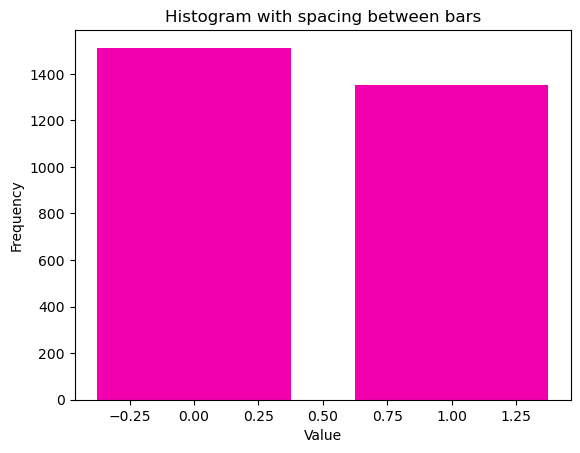

In [5]:
data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#f200ad')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

## Relevant libraries

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import preprocessor as p
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

text = "This is a great tutorial on sentiment analysis!"
blob = TextBlob(text)

In [7]:
sentiment = blob.sentiment
print(sentiment)


Sentiment(polarity=1.0, subjectivity=0.75)


In [8]:
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(polarity)
print(subjectivity)

1.0
0.75


In [9]:
from textblob import TextBlob

document = "This is a great tutorial on sentiment analysis! I really enjoyed it and learned a lot."
blob = TextBlob(document)
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.75, subjectivity=0.725)


# Apply this to our database

In [10]:
df = amazon

df['clean_reviews']=df['reviews.text'].apply(p.clean)
def clean_verified(review):
    if review[:16]=='Trip Verified | ':
        review = review[16:]
    elif review[:15]=="Not Verified | ":
        review = review[15:]
    else:
        pass
    return review
df['clean_reviews'] = df['clean_reviews'].apply(clean_verified)
def punctuation_removal(r):
    punc = '!()-[]{};:""\,<>./?@#$%^&*_~'''
    for ele in r:
        if ele in punc:
            r = r.replace(ele, "")
    return r
df['clean_reviews']=df['clean_reviews'].apply(punctuation_removal)

In [11]:
import nltk
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
def filter_words(review):
    filtered = []
    for reviews in review:
        word_tokens = word_tokenize(reviews)
        for w in word_tokens:
                if w not in stop_words and w.isalpha():
                    filtered.append(w)
    return (filtered)
reviews=[]
for i in df['clean_reviews']:
    reviews.append(i)

lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in word_tokenize(text)]
amazon['tokenized_reviews'] = amazon['clean_reviews'].apply(lemmatize_text)
amazon['tokenized_reviews'] = amazon['tokenized_reviews'].apply(lambda x: [item for item in x if item not in stop_words])
amazon['tokenized_reviews'] = amazon['tokenized_reviews'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
def sentiment_analyzer(review):
    sentiment= TextBlob(review)
    score= sentiment.sentiment.polarity
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"
    
amazon['sentiment'] = amazon['reviews.text'].apply(sentiment_analyzer)
amazon.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,label
count,0.0,2792.000000,2862.000000,0.0,0.0,2862.000000
mean,NaN,1.568768,3.324249,NaN,NaN,0.471698
std,NaN,15.420521,1.385385,NaN,NaN,0.499286
min,NaN,0.000000,1.000000,NaN,NaN,0.000000
25%,NaN,0.000000,2.000000,NaN,NaN,0.000000
50%,NaN,0.000000,3.000000,NaN,NaN,0.000000
75%,NaN,0.000000,5.000000,NaN,NaN,1.000000
max,NaN,422.000000,5.000000,NaN,NaN,1.000000


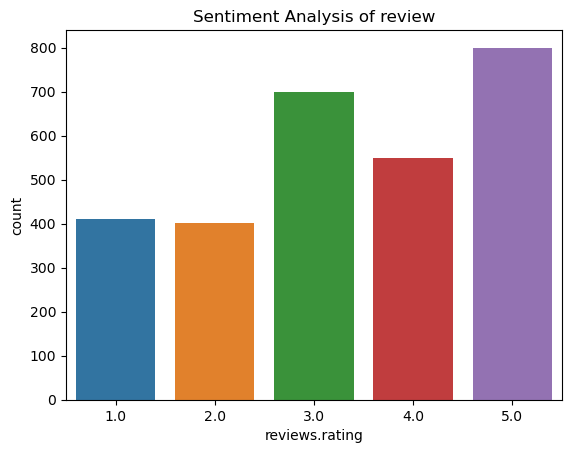

In [13]:
sns.countplot(data=df,x='reviews.rating')
plt.title('Sentiment Analysis of review')
plt.savefig('foo1.png')

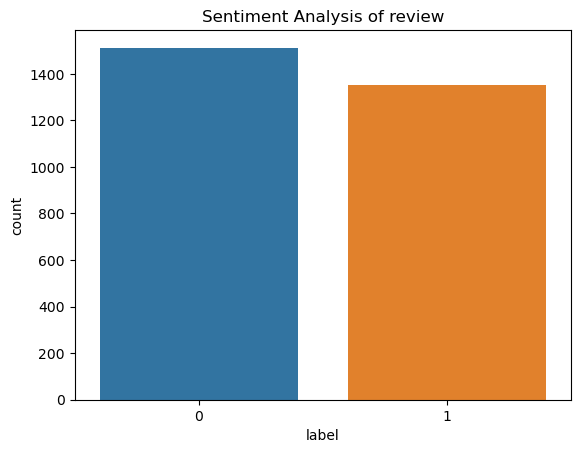

In [14]:
sns.countplot(data=df,x='label')
plt.title('Sentiment Analysis of review')
plt.savefig('foo1.png')

In [15]:
amazon['subjectivity'] = amazon['reviews.text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

def label_s(r):
    if r >= 0.5:
        return 1
    return 0

amazon['label_s'] = amazon['subjectivity'].apply(label_s)

In [16]:
amazon.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,label,subjectivity,label_s
count,0.0,2792.000000,2862.000000,0.0,0.0,2862.000000,2862.000000,2862.000000
mean,NaN,1.568768,3.324249,NaN,NaN,0.471698,0.523686,0.592243
std,NaN,15.420521,1.385385,NaN,NaN,0.499286,0.218494,0.491503
min,NaN,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,2.000000,NaN,NaN,0.000000,0.400000,0.000000
50%,NaN,0.000000,3.000000,NaN,NaN,0.000000,0.528490,1.000000
75%,NaN,0.000000,5.000000,NaN,NaN,1.000000,0.657143,1.000000
max,NaN,422.000000,5.000000,NaN,NaN,1.000000,1.000000,1.000000


# Training

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(amazon['tokenized_reviews'])

y = amazon['sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.8010471204188482


              precision    recall  f1-score   support

           0       0.87      0.22      0.35       179
           1       0.64      0.98      0.77       251

    accuracy                           0.66       430
   macro avg       0.75      0.60      0.56       430
weighted avg       0.73      0.66      0.59       430



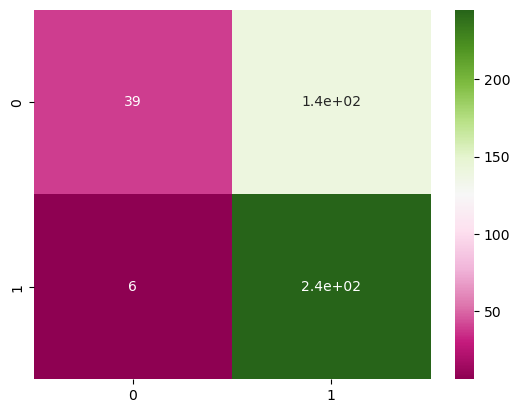

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(amazon['tokenized_reviews'])
y = amazon['label_s']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.83      0.57      0.68       182
           1       0.74      0.91      0.82       248

    accuracy                           0.77       430
   macro avg       0.78      0.74      0.75       430
weighted avg       0.78      0.77      0.76       430



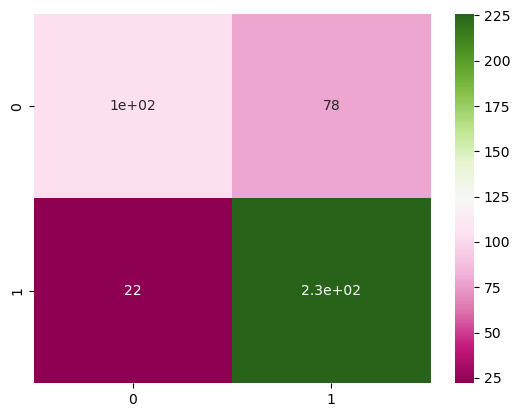

In [19]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(amazon['tokenized_reviews'])
y = amazon['label_s']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

NB_classifier = LogisticRegression()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.41      0.67      0.51       165
           1       0.66      0.40      0.50       265

    accuracy                           0.51       430
   macro avg       0.54      0.54      0.51       430
weighted avg       0.57      0.51      0.51       430



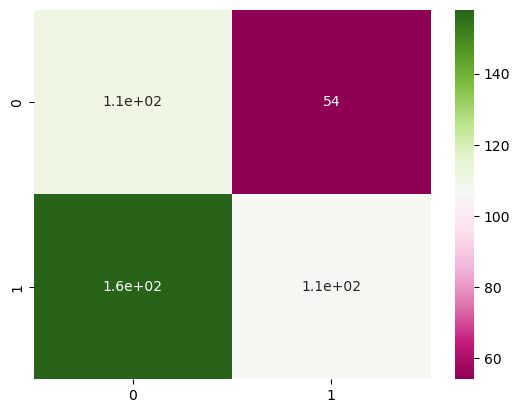

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(amazon['tokenized_reviews'])
X = X.toarray()
y = amazon['label_s']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.76      0.84      0.79       225
           1       0.80      0.70      0.75       205

    accuracy                           0.77       430
   macro avg       0.78      0.77      0.77       430
weighted avg       0.77      0.77      0.77       430



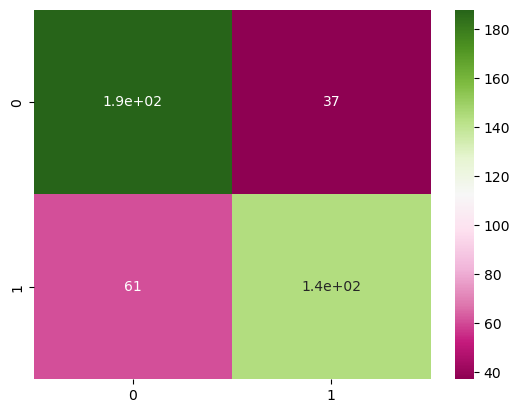

In [21]:
y = amazon['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       225
           1       0.80      0.70      0.74       205

    accuracy                           0.77       430
   macro avg       0.78      0.77      0.77       430
weighted avg       0.77      0.77      0.77       430



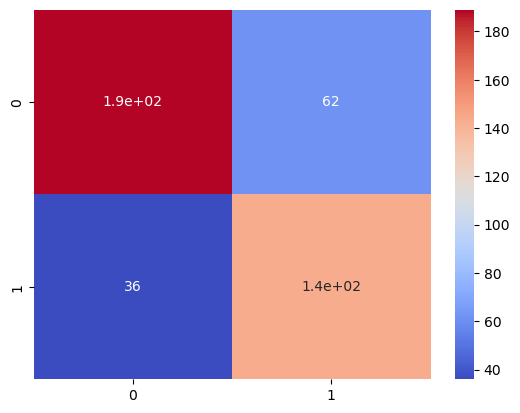

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# initialize sentiment analyzer
sid_obj = SentimentIntensityAnalyzer()

In [26]:
sid_obj.polarity_scores(amazon['reviews.text'].tolist()[:11])

{'neg': 0.073, 'neu': 0.804, 'pos': 0.123, 'compound': 0.9883}

In [31]:
df = amazon
df = df.assign(clean_review = df['reviews.text'].map(lambda x: ' '.join(TextBlob(str(x)).words)))  
df = df.assign(sentiment_scores = df.clean_review.map(lambda x: sid_obj.polarity_scores(x)))
df = df.assign(compound_scores = df.sentiment_scores.map(lambda x: x.get('compound')))
df = df.assign(positive_scores = df.sentiment_scores.map(lambda x: x.get('pos')))
df = df.assign(negative_scores = df.sentiment_scores.map(lambda x: x.get('neg')))

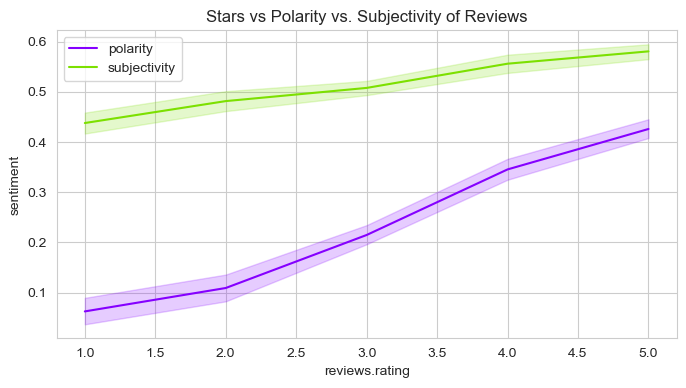

In [42]:
def leng(r):
    return len(r)

amazon['len'] = amazon['reviews.text'].apply(leng)
amazon['polarity'] = amazon['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

fig, ax = plt.subplots(figsize =(8,4))
g = sns.lineplot(data = amazon, x = 'reviews.rating', y='polarity', ax=ax, color = '#8500ff', label='polarity')
g1 = sns.lineplot(data = amazon, x = 'reviews.rating', y='subjectivity', ax=ax, color = '#7ce000', label='subjectivity')


_ = g.set_title("Stars vs Polarity vs. Subjectivity of Reviews")
_ = ax.set_ylabel("sentiment")
#plt.savefig('textblob_sentiments.png')

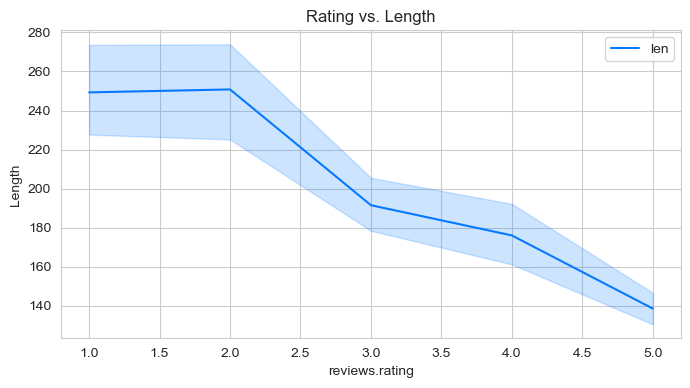

In [48]:

fig, ax = plt.subplots(figsize =(8,4))
g2 = sns.lineplot(data = amazon, x = 'reviews.rating', y='len', ax=ax, color = '#067aff', label='len')

_ = g2.set_title("Rating vs. Length")
_ = ax.set_ylabel("Length")